In [84]:
# Task 1 : Movie Rating Prediction Model



# Name : Hikma Yimer Mohammed
# Batch : A67 (August 2024)
# Internship : Data Science
# Aim : Build a Movie Rating Prediction Model

In [85]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#Load Dataset

movie_df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Explore Dataset

movie_df.shape

(15509, 10)

In [88]:
movie_df.describe()
# only the rating variable is included because it is the only pure numerical value

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [89]:
# Data Preprocessing

#first drop the rows with NaN(null) values using:
movie_df.dropna(inplace = True)

movie_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [90]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [91]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [92]:
movie_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

<Axes: >

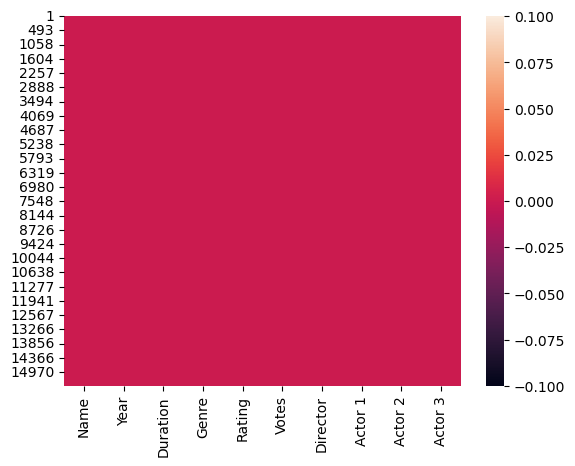

In [93]:
sns.heatmap(movie_df.isnull())
#no missing values

In [94]:
movie_df.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [96]:
#replace the non-numerical values to pure numerical values
#Duration
movie_df["Duration"] = movie_df["Duration"].str.replace("min", "").astype(int)

In [97]:
#Votes
movie_df["Votes"] = movie_df["Votes"].str.replace(",", "").astype(int)

In [98]:
#Year
movie_df["Year"] = movie_df["Year"].str.replace("(", "").str.replace(")", "").astype(int)

In [99]:
movie_df.describe()
#now all the numeric values are present

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [100]:
movie_df["Rating"].value_counts()

Rating
6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64

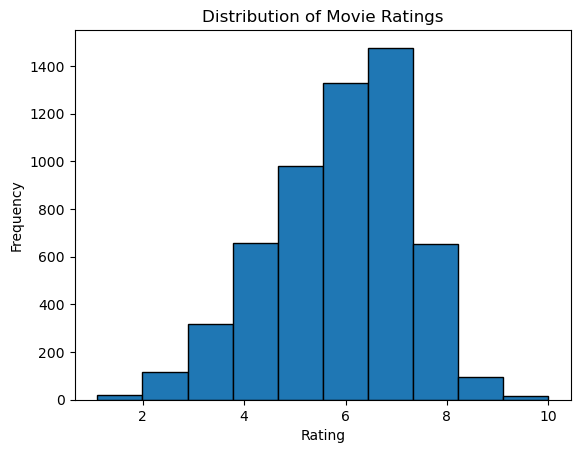

In [101]:
# Data Visualization

# understand the pread and frequency of movie ratings
plt.hist(movie_df['Rating'], edgecolor = "black")
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

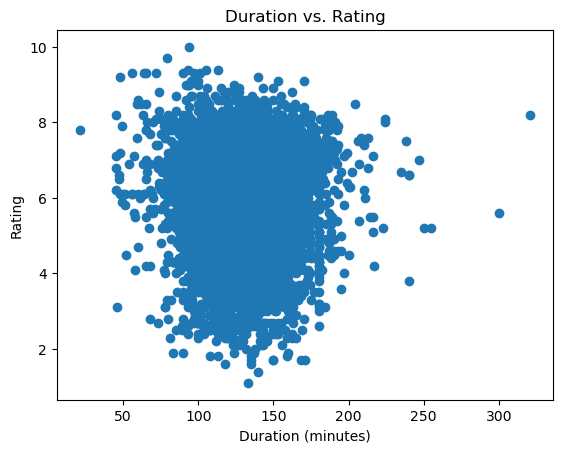

In [102]:
# understand the relationship between the duration and rating

plt.scatter(movie_df['Duration'], movie_df['Rating'])
plt.title('Duration vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()
# most movies last 100 - 200 mins

In [124]:
# split the combined genre to separate/single genres

movie_df['Genre'] = movie_df['Genre'].str.split(', ')
movie_df = movie_df.explode('Genre')
avg_rating_by_genre =  movie_df.groupby('Genre')['Rating'].mean().reset_index()

print(avg_rating_by_genre)

          Genre    Rating
0        Action  5.520463
1     Adventure  5.879422
2     Animation  6.072500
3     Biography  6.737391
4        Comedy  5.751042
5         Crime  5.820114
6   Documentary  7.608333
7         Drama  6.056744
8        Family  6.323317
9       Fantasy  5.808219
10      History  6.905051
11       Horror  4.817327
12        Music  6.071698
13      Musical  6.246845
14      Mystery  5.867763
15         News  8.000000
16      Romance  5.811087
17       Sci-Fi  5.253125
18        Sport  6.515000
19     Thriller  5.630044
20          War  5.981818
21      Western  5.700000


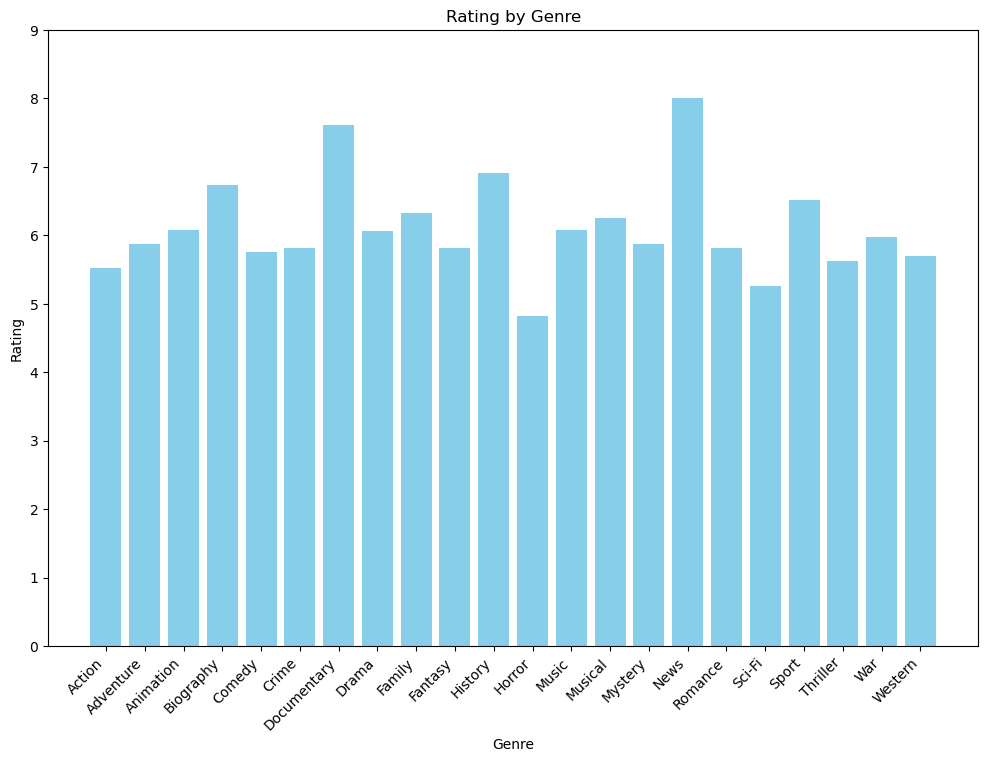

In [126]:

plt.figure(figsize=(12, 8))  # Set the figure size
plt.bar(avg_rating_by_genre['Genre'], avg_rating_by_genre['Rating'], color='skyblue')

plt.title('Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, avg_rating_by_genre['Rating'].max() + 1)  


plt.show()




In [118]:
print( movie_df.groupby('Year')['Rating'].mean().reset_index())


    Year    Rating
0   1931  5.750000
1   1932  6.000000
2   1933  6.200000
3   1934  5.600000
4   1935  5.700000
..   ...       ...
86  2017  6.012796
87  2018  6.150495
88  2019  6.265198
89  2020  6.123571
90  2021  6.522222

[91 rows x 2 columns]


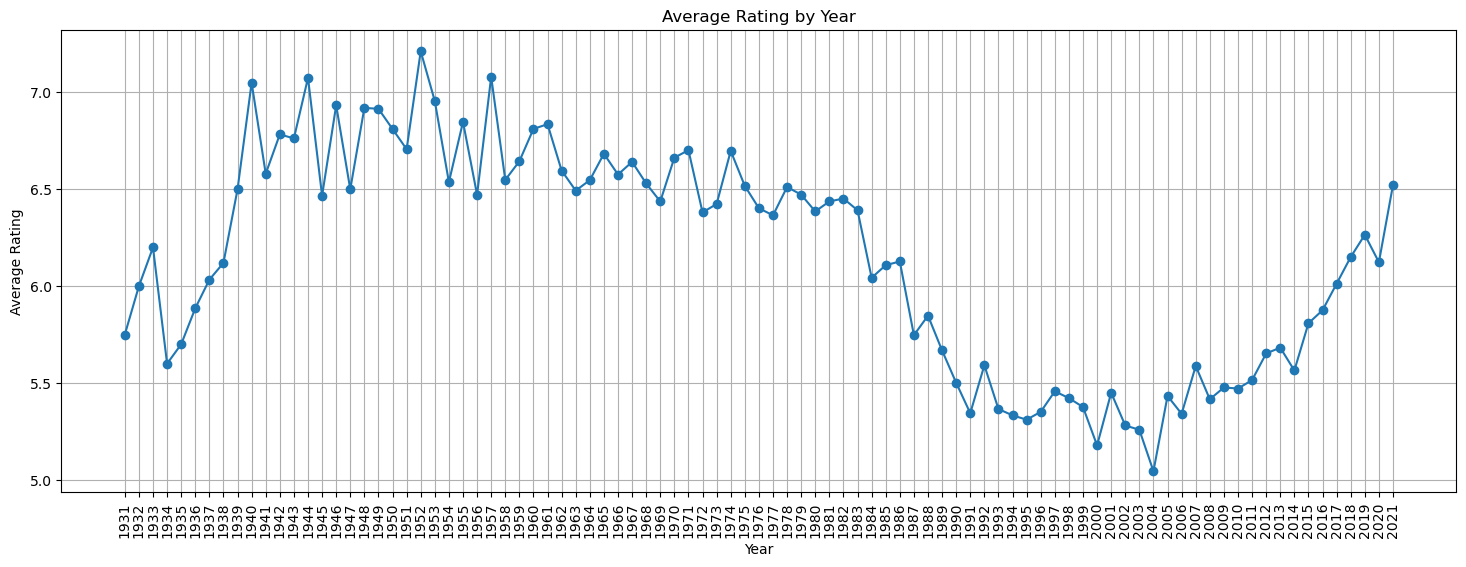

In [119]:
# for each 'Year', calculate the average rating
avg_rating_by_year = movie_df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(18, 6))
plt.plot(avg_rating_by_year['Year'], avg_rating_by_year['Rating'],marker = 'o', linestyle='-')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

plt.xticks(avg_rating_by_year['Year'], rotation=90)  
plt.grid(True)
plt.show()


In [127]:
print( movie_df.groupby('Director')['Rating'].mean().reset_index())


            Director    Rating
0       A. Bhimsingh  6.810345
1     A. Jagannathan  5.833333
2           A. Majid  5.700000
3           A. Muthu  3.000000
4          A. Salaam  5.250000
...              ...       ...
2426     Zia Sarhadi  6.820000
2427   Ziaullah Khan  5.600000
2428     Zoya Akhtar  6.878571
2429     Zubair Khan  5.400000
2430    Zunaid Memon  6.400000

[2431 rows x 2 columns]


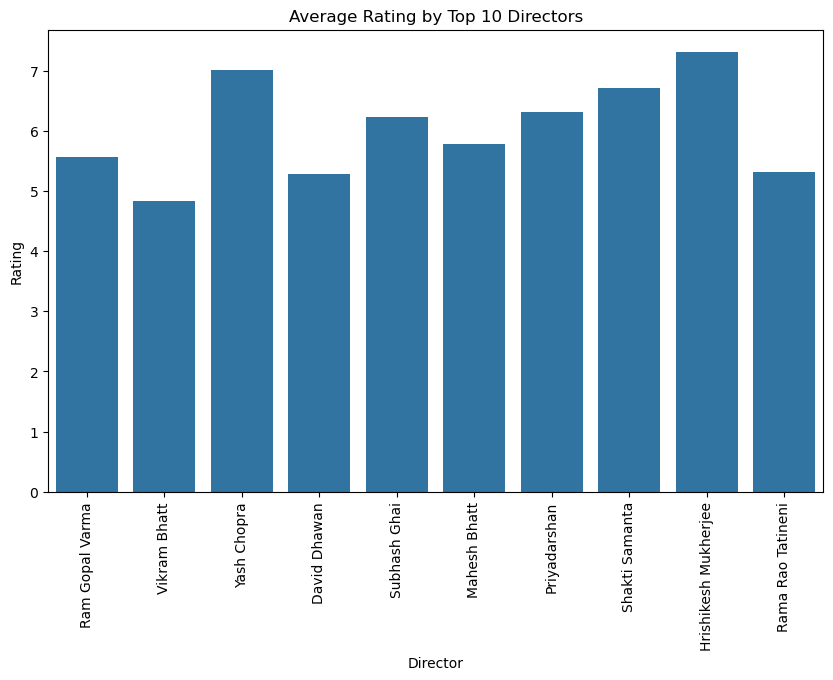

In [128]:
#director's infulence on Rating

top_directors = movie_df['Director'].value_counts().head(10).index
director_ratings = movie_df[movie_df['Director'].isin(top_directors)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Director', y='Rating', data=director_ratings, errorbar=None)
plt.title('Average Rating by Top 10 Directors')
plt.xticks(rotation=90)
plt.show()



In [157]:
movie_df.drop(columns = ["Name"], axis =1)


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating,Genre_rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.850000,7.000000,7.000000,6.056744
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.250000,4.400000,4.460000,5.751042
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.250000,4.400000,4.460000,5.811087
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.335135,4.793617,5.730000,5.930000,5.751042
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.335135,4.793617,5.730000,5.930000,6.056744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15503,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.290476,6.377419,5.800000,6.018750,6.056744
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.175000,5.440845,4.603704,5.754545,5.520463
15505,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.175000,5.440845,4.603704,5.754545,6.056744
15508,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,4.090625,6.045128,5.632558,5.780000,5.520463


In [154]:
# create new columns for representing average rating of director, genre and actors


movie_df["Director_rating"] = movie_df.groupby('Director')['Rating'].transform('mean')
movie_df["Actor1_rating"] = movie_df.groupby('Actor 1')['Rating'].transform('mean')
movie_df["Actor2_rating"] = movie_df.groupby('Actor 2')['Rating'].transform('mean')
movie_df["Actor3_rating"] = movie_df.groupby('Actor 3')['Rating'].transform('mean')
movie_df["Genre_rating"] = movie_df.groupby('Genre')['Rating'].transform('mean')



In [177]:

x = movie_df[[ 'Year', 'Votes', 'Duration', 'Genre_rating','Director_rating','Actor1_rating', 'Actor2_rating', 'Actor3_rating']]
y = movie_df['Rating']

In [178]:
#Training Model
from sklearn.model_selection import train_test_split

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Re-split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [179]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
model_prediction = model.predict(x_test)

In [139]:
x.head()

,Year,Duration,Votes,Actor1_rating,Actor2_rating,Actor3_rating
1,2019,109,8,6.850000,7.00,7.00
3,2019,110,35,5.250000,4.40,4.46
3,2019,110,35,5.250000,4.40,4.46
5,1997,147,827,4.793617,5.73,5.93
5,1997,147,827,4.793617,5.73,5.93


In [140]:
y.head()

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [182]:
# Evaluate Model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, model_prediction)
print(f'Mean Absolute Error: {mae}')


mse = mean_squared_error(y_test, model_prediction)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, model_prediction)
print(f'R-squared Score: {r2}')


Mean Absolute Error: 0.4921902540765641
Mean Squared Error: 0.4465441653985703
R-squared Score: 0.7641133663863862


In [185]:
# Test model with sample dataset
sample_df = pd.DataFrame({"Year":[2000], "Votes":[42],"Duration":[190],"Genre_rating":[6.7],"Director_rating":[4.8],"Actor1_rating":[3.5],"Actor2_rating":[5.5],"Actor3_rating":[8.1]})

In [189]:
pred = model.predict(sample_df)
print("The rating of this movie is:", pred[0])

The rating of this movie is: 5.721611739771528


In [188]:
# Save Model

import joblib
joblib.dump(model, "movie_model.pk1")

['movie_model.pk1']